In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 21 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=7604069b24617f876a425d2bc3d82d220307e5a91e0f36245d6412c580ebec19
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import cv2
import dlib
import pandas as pd
import numpy as np
import sys
import face_recognition
from google.colab.patches import cv2_imshow

In [ ]:
cd gdrive/MyDrive/ITSP\ 21

/content/gdrive/MyDrive/ITSP 21


In [ ]:
pd.read_csv('/content/gdrive/MyDrive/ITSP 21/Data/train.csv')

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...


In [ ]:
df1=pd.read_csv('/content/gdrive/MyDrive/ITSP 21/icml_face_data.csv')
df1.head()


,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [1]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

name 'take_photo' is not defined


In [ ]:
# Grab a single frame 
frame= cv2.imread('photo.jpg',cv2.IMREAD_UNCHANGED)

In [ ]:
frame2=frame

In [ ]:
# Resize frame of video to 1/4 size for faster face detection   
small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

In [ ]:
# Convert the image from BGR color (which OpenCV uses) to RGB color 
rgb_small_frame = small_frame[:, :, ::-1]

In [ ]:
# Calling face_locations function on the converted frame.  
dets = face_recognition.face_locations(rgb_small_frame)


In [ ]:
# Loop over the identified locations to draw a rectangle on the face
for (top, right, bottom, left) in dets:
  
        
# Scale back up face locations since the frame we detected in was 
# scaled to 1/4 size
  top *= 4
  right *= 4
  bottom *= 4
  left *= 4
# Draw a box around the face
  cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
  

In [ ]:
frame1=frame

In [2]:
# Display the resulting image
cv2_imshow(frame)


NameError: ignored

In [ ]:

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
roi_gray = gray[top:bottom, left:right]                     #croping
cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)


In [ ]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
roi_gray=[]
cropped_img=[]
j=0
for i in left_a:
  roi_gray.append(gray[top_a[j]:bottom_a[j], left_a[j]:right_a[j]])
  cropped_img1=np.expand_dims(np.expand_dims(cv2.resize(roi_gray[j], (48, 48)), -1), 0)
  cropped_img.append(cropped_img1)
  j=j+1

In [ ]:
# Create a HOG face detector using the built-in dlib class
face_detector = dlib.get_frontal_face_detector()

dets = face_detector(frame, 1)

array([[[[ 54],
         [ 44],
         [ 30],
         ...,
         [ 49],
         [ 31],
         [ 22]],

        [[ 50],
         [ 38],
         [ 27],
         ...,
         [ 63],
         [ 37],
         [ 25]],

        [[ 46],
         [ 35],
         [ 26],
         ...,
         [ 83],
         [ 54],
         [ 32]],

        ...,

        [[ 13],
         [ 12],
         [ 12],
         ...,
         [ 92],
         [ 89],
         [ 91]],

        [[ 16],
         [ 13],
         [ 13],
         ...,
         [102],
         [110],
         [121]],

        [[ 18],
         [ 15],
         [ 15],
         ...,
         [107],
         [122],
         [141]]]], dtype=uint8)

In [ ]:
# Loop over the identified locations to draw a rectangle on the face
count=0 #for counting no of faces
left_a=[]
right_a=[]
top_a=[]
bottom_a=[]

for (i, face) in enumerate(dets):
  top = max(0, face.top())
  bottom = min(face.bottom(), frame.shape[0])
  left = max(0, face.left())
  right = min(face.right(), frame.shape[1])
  count=count+1
  left_a.append(left)
  right_a.append(right)
  top_a.append(top)
  bottom_a.append(bottom)
# Draw a box around the face
  cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
  #pose_landmarks = face_pose_predictor(frame, face)

In [ ]:
frame1=frame
count

7

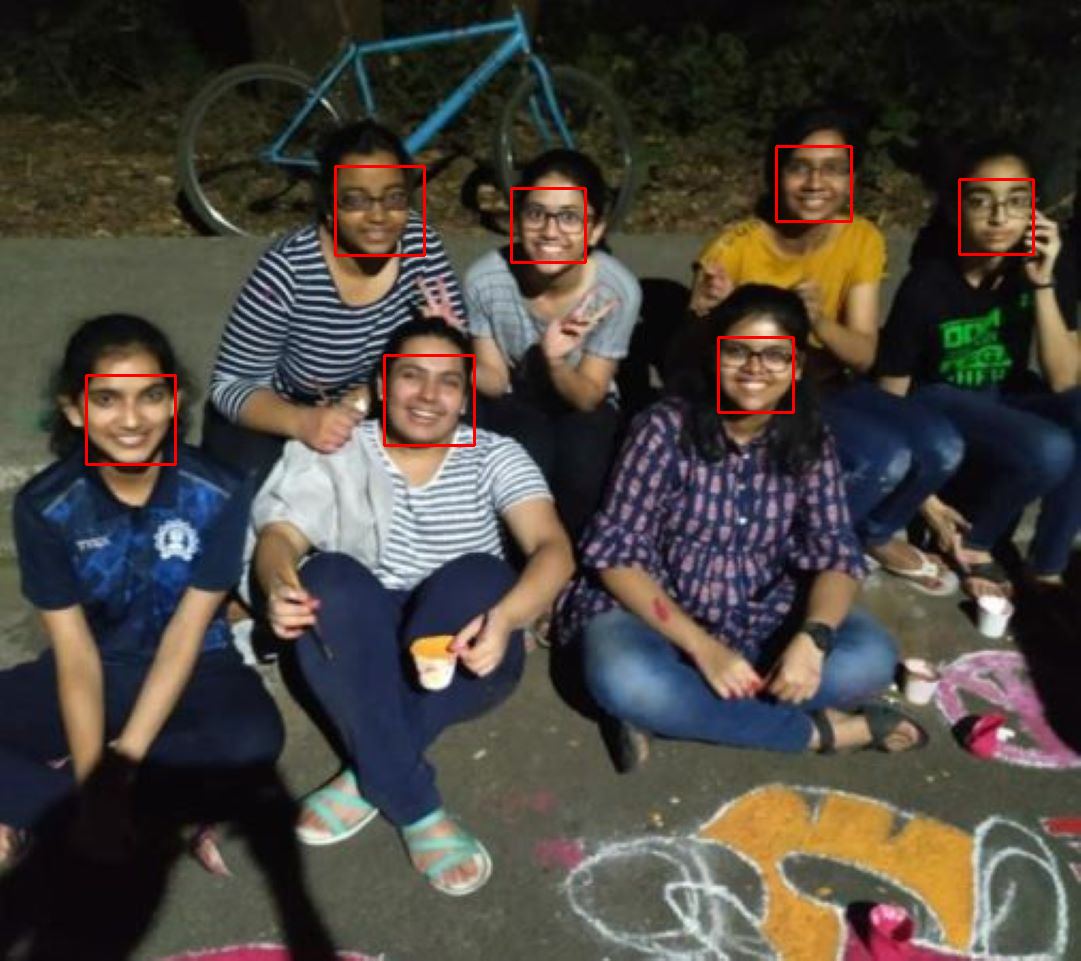

In [ ]:
cv2_imshow(frame)

In [ ]:
	alignedFace = face_aligner.align(534, frame, face, landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)
 

In [ ]:
# Loop over the identified locations to draw a rectangle on the face
for (i, face) in enumerate(dets):
  top = face.top()
  bottom = face.bottom()
  left = face.left()
  right = face.right()

# Draw a box around the face
  cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

Using ML

In [ ]:
from google.colab import files

files.upload()

Saving friends.jpeg to friends (1).jpeg


{'friends.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc0\x00\x11\x08\x03\xc1\x049\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\

In [ ]:
df = pd.read_csv("train.csv")
df.head()

FileNotFoundError: ignored

# New Section

In [ ]:

import cv2
image_size=(48,48)
pixels = df['pixels'].tolist() # Converting the relevant column element into a list for each row
width, height = 48, 48
faces = []

for pixel_sequence in pixels:
  face = [int(pixel) for pixel in pixel_sequence.split(' ')] # Splitting the string by space character as a list
  face = np.asarray(face).reshape(width, height) #converting the list to numpy array in size of 48*48
  face = cv2.resize(face.astype('uint8'),image_size) #resize the image to have 48 cols (width) and 48 rows (height)
  faces.append(face.astype('float32')) #makes the list of each images of 48*48 and their pixels in numpyarray form
  
faces = np.asarray(faces) #converting the list into numpy array
faces = np.expand_dims(faces, -1) #Expand the shape of an array -1=last dimension => means color space
emotions = pd.get_dummies(df['emotion']).to_numpy() #doing the one hot encoding type on emotions


NameError: ignored

In [ ]:
x = faces.astype('float32')
x = x / 255.0 #Dividing the pixels by 255 for normalization  => range(0,1)

# Scaling the pixels value in range(-1,1)
x = x - 0.5
x = x * 2.0

In [ ]:
num_samples, num_classes = emotions.shape

num_samples = len(x)
num_train_samples = int((1 - 0.2)*num_samples)

# Traning data
train_x = x[:num_train_samples]
train_y = emotions[:num_train_samples]

# Validation data
val_x = x[num_train_samples:]
val_y = emotions[num_train_samples:]

train_data = (train_x, train_y)
val_data = (val_x, val_y)

In [ ]:
#load the libaray to built the model
from keras.layers import Activation, Convolution2D, Dropout, Conv2D, Dense
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2
from tensorflow.keras.layers import LeakyReLU
import tensorflow as tf
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
""" Building up Model Architecture """

model = Sequential()
model.add(Convolution2D(filters=32, kernel_size=(3, 3), padding='same',
                            name='image_array', input_shape=(64,64,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

#model.add(Convolution2D(filters=256, kernel_size=(3, 3), padding='same'))



#model.add(BatchNormalization())
#model.add(Convolution2D(filters=num_classes, kernel_size=(3, 3), padding='same'))
#model.add(GlobalAveragePooling2D())

model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, input_dim=1, activation='relu'))
model.add(Dense(1, input_dim=1, activation='sigmoid'))
model.add(Activation('softmax',name='predictions'))

In [ ]:
""" Building up Model Architecture """

model = Sequential()
model.add(Convolution2D(filters=32, kernel_size=(7, 7), padding='same',
                            name='image_array', input_shape=(64,64,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=32, kernel_size=(7, 7), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=64, kernel_size=(5, 5), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=64, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(.5))

model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(.5))

model.add(Convolution2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(.5))

model.add(Convolution2D(filters=256, kernel_size=(3, 3), padding='same'))

model.add(Activation('relu'))

model.add(BatchNormalization())
model.add(Convolution2D(filters=num_classes, kernel_size=(3, 3), padding='same'))

model.add(GlobalAveragePooling2D())
model.add(Activation('sigmoid',name='predictions'))

NameError: ignored

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (Conv2D)         (None, 64, 64, 32)        1600      
_________________________________________________________________
activation_53 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_53 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 64, 64, 32)        50208     
_________________________________________________________________
batch_normalization_54 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
activation_54 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
average_pooling2d_24 (Averag (None, 32, 32, 32)       

In [ ]:
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)

In [ ]:
#import
from keras.callbacks import CSVLogger,ModelCheckpoint,EarlyStopping
from keras.callbacks import ReduceLROnPlateau

# parameters
batch_size = 32 #Number of samples per gradient update
num_epochs = 20 # Number of epochs to train the model.
#input_shape = (64, 64, 1)
verbose = 1 #per epohs  progress bar
num_classes = 7 
patience = 50
datasets = ['fer2013']
num_epochs = 300
base_path="/content"
for dataset_name in datasets:
    print('Training dataset:', dataset_name)

    #callbacks
    log_file_path = dataset_name + '_emotion_training.log'

    csv_logger = CSVLogger(log_file_path, append=False)
    early_stop = EarlyStopping('val_loss', patience=patience)
    reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,patience=int(patience/4), verbose=1)
    
    trained_models_path = base_path + dataset_name + 'simple_cnn'
    model_names = trained_models_path + '.{epoch:02d}-{val_loss:.2f}.hdf5'      # if error "acc" in 1 line ... don't confuse check entire block since fit() generates a inner loop
    model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,save_best_only=True)
    my_callbacks = [model_checkpoint, csv_logger, early_stop, reduce_lr]

    # loading dataset
    train_faces, train_emotions = (x,emotions)
    history=model.fit_generator(data_generator.flow(train_faces, train_emotions,
                                            batch_size),
                        epochs=num_epochs, verbose=1
                        ,callbacks=my_callbacks,validation_data =data_generator.flow(val_x, val_y,batch_size) )  #not callbacks = [my_callbacks] since we my_callbacks is already a list

Training dataset: fer2013
Epoch 1/300


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:5017: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'


898/898 [==============================] - 21s 21ms/step - loss: 0.3859 - accuracy: 0.2743 - val_loss: 0.3465 - val_accuracy: 0.3892

Epoch 00001: val_loss improved from inf to 0.34646, saving model to /contentfer2013simple_cnn.01-0.35.hdf5
Epoch 2/300
898/898 [==============================] - 18s 20ms/step - loss: 0.3364 - accuracy: 0.4014 - val_loss: 0.3104 - val_accuracy: 0.4580

Epoch 00002: val_loss improved from 0.34646 to 0.31042, saving model to /contentfer2013simple_cnn.02-0.31.hdf5
Epoch 3/300
898/898 [==============================] - 18s 20ms/step - loss: 0.3139 - accuracy: 0.4576 - val_loss: 0.3045 - val_accuracy: 0.4855

Epoch 00003: val_loss improved from 0.31042 to 0.30451, saving model to /contentfer2013simple_cnn.03-0.30.hdf5
Epoch 4/300
898/898 [==============================] - 18s 20ms/step - loss: 0.2968 - accuracy: 0.4924 - val_loss: 0.2814 - val_accuracy: 0.5307

Epoch 00004: val_loss improved from 0.30451 to 0.28135, saving model to /contentfer2013simple_cnn.0

In [ ]:
#evaluate() returns [loss,acc]
score = model.evaluate(train_x, train_y, verbose=1) 
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

718/718 [==============================] - 4s 6ms/step - loss: 0.0116 - accuracy: 0.9879
Test loss: 0.011645651422441006
Test accuracy: 98.7895667552948


In [ ]:
score = model.evaluate(val_x, val_y, verbose=1) 
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

180/180 [==============================] - 1s 6ms/step - loss: 0.0111 - accuracy: 0.9875
Test loss: 0.011061927303671837
Test accuracy: 98.74607920646667


In [ ]:

""" metrics collected by history object """
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

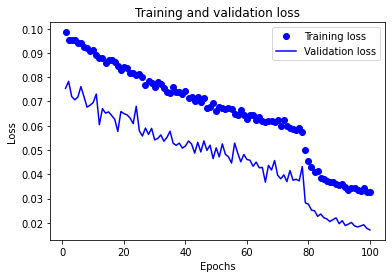

In [ ]:
import matplotlib.pyplot as plt

train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

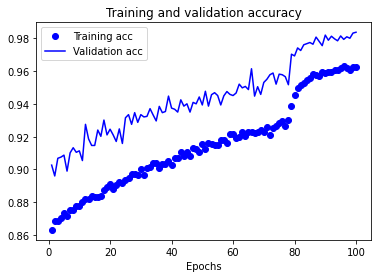

In [ ]:

train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('')
plt.legend()
plt.show()

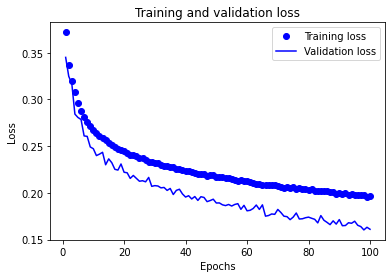

In [ ]:
import matplotlib.pyplot as plt

train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

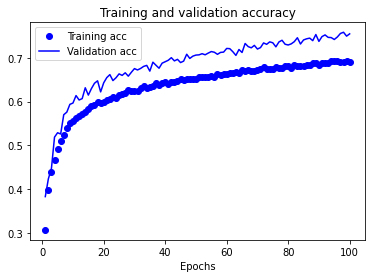

In [ ]:

train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('')
plt.legend()
plt.show()

In [ ]:
model.save("my_model.h5")

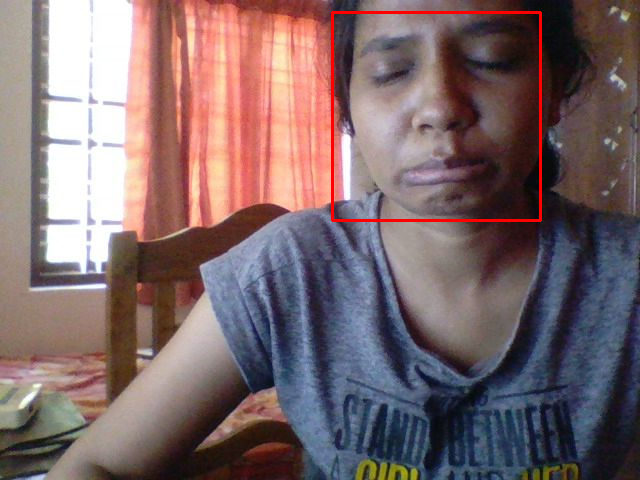

In [ ]:

prediction = model.predict(cropped_img)

maxindex = int(np.argmax(prediction))
emotion_dict = {
  0: "Angry",
  1: "Disgust",
  2: "Fear",
  3: "happy",
  4: "sad",
  5: "surprise",
  6: "neutral"
}
cv2.putText(frame, emotion_dict[maxindex], (left+10, top-20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)  
                                              #if text is not apeared , change coordinates. it may work
cv2_imshow(frame)

In [ ]:
prediction


array([[0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
j=0
prediction=[]
for i in left_a:

  predict = model.predict(cropped_img[j])
  prediction.append(predict)
  maxindex = int(np.argmax(prediction[j]))
  emotion_dict = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "happy",
    4: "sad",
    5: "surprise",
    6: "neutral"
  }
  cv2.putText(frame, emotion_dict[maxindex], (left_a[j]+10, top_a[j]-20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)  
                                              #if text is not apeared , change coordinates. it may work
  j=j+1

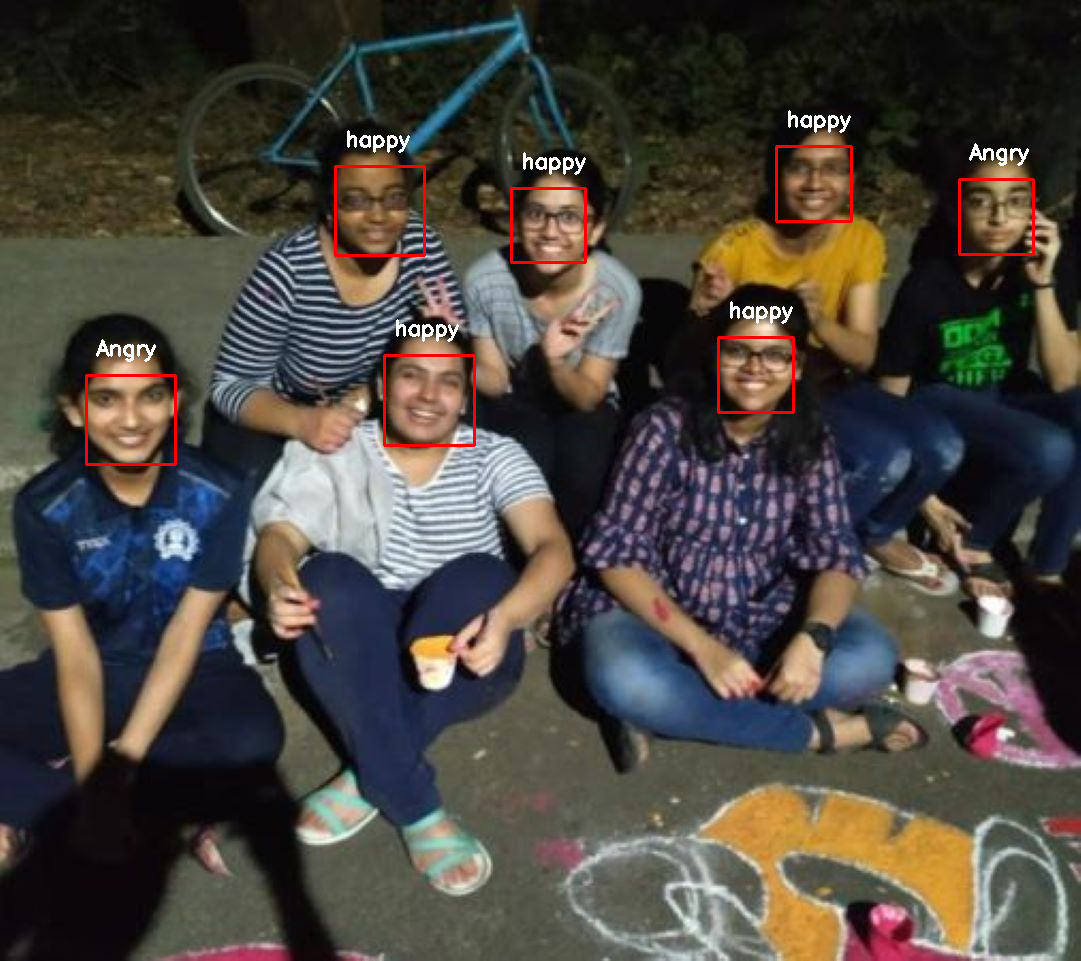

In [ ]:
cv2_imshow(frame)

In [ ]:
prediction

[array([[0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 1., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 1., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 1., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 1., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 1., 0., 0., 0.]], dtype=float32)]

In [ ]:
a=[];


In [ ]:
a.append(1)

In [ ]:
a.append(2)

In [ ]:
a[0]

1

In [ ]:
a[1]

2